# Week 5 
* Gridsearch and Pipeline
* Kaggle cooking Competition.

In [1]:
import pandas as pd
train = pd.read_json("train.json")
train.head(3)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."


In [2]:
train.shape

(39774, 3)

In [3]:
train.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [4]:
# [row* columns]
train.loc[0,"ingredients"]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [5]:
train.head(2)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."


In [6]:
train["num_ingredients"]= train.ingredients.apply(len)
train.head()

,cuisine,id,ingredients,num_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


In [7]:
train.groupby("cuisine").num_ingredients.mean()

cuisine
brazilian        9.520343
british          9.708955
cajun_creole    12.617076
chinese         11.982791
filipino        10.000000
french           9.817838
greek           10.182128
indian          12.705961
irish            9.299850
italian          9.909033
jamaican        12.214829
japanese         9.735067
korean          11.284337
mexican         10.877446
moroccan        12.909866
russian         10.224949
southern_us      9.634954
spanish         10.423660
thai            12.545809
vietnamese      12.675152
Name: num_ingredients, dtype: float64

In [8]:
train.groupby("cuisine").num_ingredients.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,467.0,9.520343,5.555139,2.0,5.0,9.0,13.0,59.0
british,804.0,9.708955,4.165011,2.0,7.0,9.0,12.0,30.0
cajun_creole,1546.0,12.617076,4.611601,2.0,9.0,12.0,16.0,31.0
chinese,2673.0,11.982791,4.042125,2.0,9.0,12.0,14.0,38.0
filipino,755.0,10.000000,3.855135,2.0,7.0,10.0,12.0,38.0
french,2646.0,9.817838,4.144744,1.0,7.0,9.0,12.0,31.0
greek,1175.0,10.182128,3.729461,1.0,7.0,10.0,12.0,27.0
indian,3003.0,12.705961,5.016806,1.0,9.0,12.0,16.0,49.0
irish,667.0,9.299850,3.700505,2.0,7.0,9.0,12.0,27.0


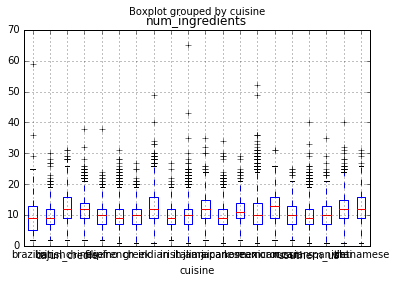

In [9]:
% matplotlib inline
train.boxplot(column = "num_ingredients", by = "cuisine")

In [10]:
# define a function that calculates the mean string length from a list of strings
import numpy as np
def mean_string_len(list_of_string):
    return np.mean([len(string) for string in list_of_string])

In [11]:
sample = train.loc[0, "ingredients"]
sample

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [12]:
mean_string_len(sample)

12.0

In [13]:
train["ingredient_length"] = train.ingredients.apply(mean_string_len)
train.head()

,cuisine,id,ingredients,num_ingredients,ingredient_length
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000


In [14]:
# we have to define the function to make features. since we have to test our module on the same features.
def make_features(df):
    df["num_ingredients"]= df.ingredients.apply(len)
    df["ingredient_length"] = df.ingredients.apply(mean_string_len)
    return df

In [15]:
train = pd.read_json("train.json")
make_features(train).head()

,cuisine,id,ingredients,num_ingredients,ingredient_length
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000


# Module Evaluation using X and y

In [16]:
feature_cols = ["num_ingredients", "ingredient_length"]
X = train[feature_cols]
y = train.cuisine

In [17]:
print(X.shape)
print(y.shape)

(39774, 2)
(39774,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)

In [19]:
from sklearn.cross_validation import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [21]:
y_pred_class = knn.predict(X_test)

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.21932823813354788

In [23]:
from sklearn.cross_validation import cross_val_score
cross_val_score(knn, X, y, cv= 5, scoring = "accuracy").mean()

0.21591924749538957

In [24]:
y_test.value_counts().head(1)/ y_test.shape

italian    0.199216
Name: cuisine, dtype: float64

In [25]:
# This is null module.

# making prediction for new data

In [26]:
new = make_features(pd.read_json("test.json"))
new.head(3)

,id,ingredients,num_ingredients,ingredient_length
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6,9.333333
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11,10.272727
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6,9.666667


In [27]:
new.shape

(9944, 4)

In [28]:
X_new = new[feature_cols]
X_new.head()

,num_ingredients,ingredient_length
0,6,9.333333
1,11,10.272727
2,6,9.666667
3,21,12.000000
4,8,13.000000


In [29]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [30]:
new_pred_class = knn.predict(X_new)

In [31]:
new_pred_class

array(['mexican', 'southern_us', 'mexican', ..., 'italian', 'mexican',
       'mexican'], dtype=object)

In [32]:
pd.DataFrame({"id": new.id, "cuisine": new_pred_class}).set_index("id").to_csv("sub1.csv")

# Class 2

In [33]:
from sklearn.grid_search import GridSearchCV
params_grid = {}
params_grid["n_neighbors"] = [100, 200]
params_grid

{'n_neighbors': [100, 200]}

In [34]:
grid = GridSearchCV(knn, params_grid, scoring = "accuracy")

In [35]:
grid.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [100, 200]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [36]:
grid.grid_scores_

[mean: 0.21589, std: 0.00207, params: {'n_neighbors': 100},
 mean: 0.21904, std: 0.00149, params: {'n_neighbors': 200}]

In [37]:
# lets try for another parameter
params_grid = {}
params_grid["n_neighbors"] = list(range(200,1001,200))
params_grid

{'n_neighbors': [200, 400, 600, 800, 1000]}

In [38]:
grid = GridSearchCV(knn, params_grid, cv=5, scoring='accuracy')

In [39]:
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [200, 400, 600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [40]:
%time grid.grid_scores_

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


[mean: 0.21949, std: 0.00181, params: {'n_neighbors': 200},
 mean: 0.21994, std: 0.00331, params: {'n_neighbors': 400},
 mean: 0.22213, std: 0.00154, params: {'n_neighbors': 600},
 mean: 0.22296, std: 0.00191, params: {'n_neighbors': 800},
 mean: 0.22193, std: 0.00169, params: {'n_neighbors': 1000}]

In [41]:
print(grid.best_score_)
print(grid.best_params_)

0.222959722432
{'n_neighbors': 800}


#  Extracting features from text using CountVectorizer¶

In [42]:
type(train.ingredients)
train.ingredients.head(0)

Series([], Name: ingredients, dtype: object)

In [43]:
train.ingredients.astype(str)[0]

"['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']"

In [44]:
def make_features(df):
    df['num_ingredients'] = df.ingredients.apply(len)
    df['ingredient_length'] = df.ingredients.apply(lambda x: np.mean([len(item) for item in x]))
    df['ingredients_str'] = df.ingredients.astype(str)
    return df

In [45]:
train = make_features(pd.read_json("train.json"))
train.head(2)

,cuisine,id,ingredients,num_ingredients,ingredient_length,ingredients_str
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000,"['romaine lettuce', 'black olives', 'grape tom..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909,"['plain flour', 'ground pepper', 'salt', 'toma..."


In [46]:
# define X and y
X = train.ingredients_str
y = train.cuisine

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [48]:
X_dtm = vect.fit_transform(X)
X_dtm.shape

(39774, 3010)

In [49]:
print(vect.get_feature_names()[0:50])

['00', '10', '100', '14', '15', '25', '33', '40', '43', '95', '96', 'abalone', 'abbamele', 'absinthe', 'abura', 'acai', 'accent', 'accompaniment', 'achiote', 'acid', 'acini', 'ackee', 'acorn', 'acting', 'activ', 'active', 'added', 'adobo', 'adzuki', 'agar', 'agave', 'age', 'aged', 'ahi', 'aioli', 'ajinomoto', 'ajwain', 'aka', 'alaskan', 'albacore', 'alcohol', 'ale', 'aleppo', 'alexia', 'alfalfa', 'alfredo', 'all', 'allspice', 'almond', 'almondmilk']


In [50]:
vect = CountVectorizer(token_pattern=r"'([a-z]+)'")
X_dtm = vect.fit_transform(X)
X_dtm.shape

(39774, 1154)

In [51]:
# examine the features that were created
print(vect.get_feature_names()[0:50])

['abalone', 'abbamele', 'absinthe', 'accent', 'accompaniment', 'achiote', 'ackee', 'adobo', 'agar', 'ahi', 'aioli', 'ajinomoto', 'ajwain', 'albacore', 'alcohol', 'ale', 'aleppo', 'allspice', 'almonds', 'alum', 'amaranth', 'amaretti', 'amaretto', 'amba', 'amber', 'amchur', 'america', 'ampalaya', 'ancho', 'anchovies', 'angus', 'anise', 'anisette', 'annatto', 'any', 'aonori', 'apples', 'applesauce', 'apricots', 'aquavit', 'arak', 'arame', 'arhar', 'armagnac', 'arrowroot', 'artichokes', 'arugula', 'asadero', 'asafetida', 'asafoetida']


In [52]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [53]:
cross_val_score(nb, X_dtm, y,  cv=5, scoring = "accuracy").mean()

0.50596024216248314

# Pipeline

In [54]:
train.describe()

,id,num_ingredients,ingredient_length
count,39774.000000,39774.000000,39774.000000
mean,24849.536959,10.767713,11.733187
std,14360.035505,4.428978,2.364183
min,0.000000,1.000000,4.000000
25%,12398.250000,8.000000,10.200000
50%,24887.000000,10.000000,11.625000
75%,37328.500000,13.000000,13.117647
max,49717.000000,65.000000,31.400000


In [55]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values="1", strategy= "median")

In [56]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(imp,knn)
pipe.steps

[('imputer',
  Imputer(axis=0, copy=True, missing_values='1', strategy='median', verbose=0)),
 ('kneighborsclassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=100, p=2,
             weights='uniform'))]

In [59]:
pipe = make_pipeline(vect, nb)
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern="'([a-z]+)'", tokenizer=None,
          vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [61]:
cross_val_score(pipe, X, y , cv=5, scoring = "accuracy").mean()

0.50676487220774291

In [62]:
pipe.fit(X,y)

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern="'([a-z]+)'", tokenizer=None,
        vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [65]:
new = make_features(pd.read_json("test.json"))
new.head()

,id,ingredients,num_ingredients,ingredient_length,ingredients_str
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6,9.333333,"['baking powder', 'eggs', 'all-purpose flour',..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11,10.272727,"['sugar', 'egg yolks', 'corn starch', 'cream o..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6,9.666667,"['sausage links', 'fennel bulb', 'fronds', 'ol..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",21,12.000000,"['meat cuts', 'file powder', 'smoked sausage',..."
4,35687,"[ground black pepper, salt, sausage casings, l...",8,13.000000,"['ground black pepper', 'salt', 'sausage casin..."


In [66]:
X_new = new.ingredients_str

In [68]:
new_pred_class_pipe = pipe.predict(X_new)


array(['british', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], 
      dtype='<U12')

In [69]:
pd.DataFrame({'id':new.id, 'cuisine':new_pred_class_pipe}).set_index('id').to_csv('sub2.csv')